In [12]:
import logging
mpl_logger = logging.getLogger('matplotlib')
mpl_logger.setLevel(logging.WARNING)
import matplotlib.pyplot as plt
from imview import pltlib
import isce
from contrib.geo_autoRIFT.autoRIFT import autoRIFT_ISCE
from pygeotools.lib import iolib,geolib,malib
import numpy as np

In [14]:
l_img = '/home/whyj/Downloads/Cropped/LC08_L1TP_061018_20180304_20180319_01_T1_B8_s.TIF'
r_img = '/home/whyj/Downloads/Cropped/LC08_L1TP_061018_20180608_20180615_01_T1_B8_s.TIF'
l_img_ds = iolib.fn_getds(l_img)
r_img_ds = iolib.fn_getds(r_img)
l_img_ma = iolib.ds_getma(l_img_ds)
r_img_ma = iolib.ds_getma(r_img_ds)

In [17]:
obj = autoRIFT_ISCE()
obj.configure()
obj.I1 = l_img_ma
obj.I2 = r_img_ma

In [18]:
chip_size_min = 16
chip_size_max = 64
obj.ChipSizeMinX = chip_size_min
obj.ChipSizeMaxX = chip_size_max
obj.ChipSize0X = chip_size_min
skip_rate = 8
obj.SkipSampleX = skip_rate
obj.SkipSampleY = skip_rate
walis_filter_width = 3
obj.WallisFilterWidth = walis_filter_width
obj.preprocess_filt_lap()
obj.uniform_data_type()

m,n = obj.I1.shape
xGrid = np.arange(obj.SkipSampleX+10,n-obj.SkipSampleX,obj.SkipSampleX)
yGrid = np.arange(obj.SkipSampleY+10,m-obj.SkipSampleY,obj.SkipSampleY) 
nd = xGrid.__len__()
md = yGrid.__len__()
obj.xGrid = np.int32(np.dot(np.ones((md,1)),np.reshape(xGrid,(1,xGrid.__len__()))))
obj.yGrid = np.int32(np.dot(np.reshape(yGrid,(yGrid.__len__(),1)),np.ones((1,nd))))
noDataMask = np.logical_not(obj.xGrid)
obj.MultiThread = 8
obj.SearchLimitX = 10
obj.SearchLimitY = 10

In [19]:
%time obj.runAutorift()

/home/whyj/anaconda3/envs/carst/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1113: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,
/home/whyj/Software/isce2-2.4.2-install/isce/components/contrib/geo_autoRIFT/autoRIFT/autoRIFT.py:1045: RuntimeWarning: divide by zero encountered in true_divide
  DxMadmin = np.ones(Dx.shape) / OverSampleRatio / SearchLimitX * 2;
/home/whyj/Software/isce2-2.4.2-install/isce/components/contrib/geo_autoRIFT/autoRIFT/autoRIFT.py:1046: RuntimeWarning: divide by zero encountered in true_divide
  DyMadmin = np.ones(Dy.shape) / OverSampleRatio / SearchLimitY * 2;
/home/whyj/Software/isce2-2.4.2-install/isce/components/contrib/geo_autoRIFT/autoRIFT/autoRIFT.py:999: RuntimeWarning: Mean of empty slice
  C = np.nanmean(B,axis=0).reshape(output_size)


CPU times: user 17.2 s, sys: 6.44 s, total: 23.6 s
Wall time: 15.3 s


<AxesSubplot:>

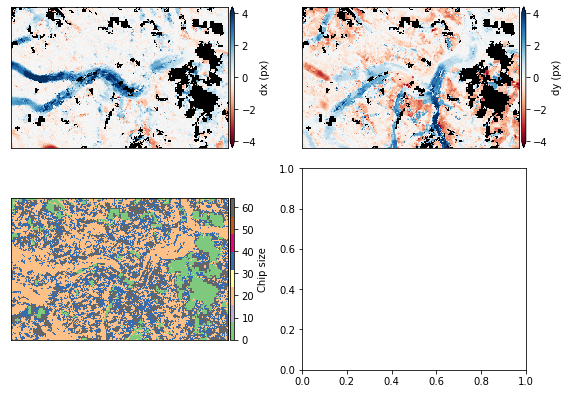

In [20]:
f,axa = plt.subplots(2,2,figsize=(8,6))
clim = (-4,4)
ax = axa.ravel()
pltlib.iv(np.ma.fix_invalid(obj.Dx),ax=ax[0],cmap='RdBu',label='dx (px)',clim=clim)
pltlib.iv(np.ma.fix_invalid(obj.Dy),ax=ax[1],cmap='RdBu',label='dy (px)',clim=clim)
pltlib.iv(np.ma.fix_invalid(obj.ChipSizeY),ax=ax[2],cmap='Accent',label='Chip size')
# pltlib.iv(np.ma.array(obj.InterpMask),ax=ax[3],cmap='inferno',label='Interpolation mask')